<a href="https://colab.research.google.com/github/nicxs3/nutriBERT/blob/main/nutriBench.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers sentence-transformers scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [1]:
import pandas as pd

train_df = pd.read_csv("/train.csv")
val_df = pd.read_csv("/val.csv")
test_df = pd.read_csv("/test.csv")


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_df["query"])
X_val = vectorizer.transform(val_df["query"])

model = Ridge()
model.fit(X_train, train_df["carb"])
preds = model.predict(X_val)

mae = mean_absolute_error(val_df["carb"], preds)
print("Validation MAE:", mae)


Validation MAE: 14.771728694295012


Used TF-IDF for preprocessing and a Ridge Regression model, Validation MAE: 14.7717

In [ ]:
!pip install -q sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 35.6 MB/s eta 0:00:00


In [3]:
from sentence_transformers import SentenceTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error


In [4]:
# Load pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode text descriptions into 384-dimensional vectors
X_train = model.encode(train_df['query'].tolist())
X_val = model.encode(val_df['query'].tolist())

mlp = MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)
mlp.fit(X_train, train_df['carb'])

preds = mlp.predict(X_val)
mae = mean_absolute_error(val_df['carb'], preds)
print("Validation MAE:", mae)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Validation MAE: 9.868263752363209


Sentence-BERT for preprocessing and MLP model, Valdiation MAE: 9.8682

In [ ]:
!pip install transformers
!pip install datasets
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [5]:
import pandas as pd

train_df = pd.read_csv('/train.csv')
val_df = pd.read_csv('/val.csv')

from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def tokenize(batch):
    return tokenizer(batch["query"], padding="max_length", truncation=True, max_length=64)



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [6]:
from torch.utils.data import Dataset

class NutriDataset(Dataset):
    def __init__(self, df, tokenizer):
        self.encodings = tokenizer(df["query"].tolist(), truncation=True, padding="max_length", max_length=64)
        self.labels = df["carb"].tolist()

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx], dtype=torch.float)
        return item

    def __len__(self):
        return len(self.labels)


In [7]:
from torch.utils.data import DataLoader

train_dataset = NutriDataset(train_df, tokenizer)
val_dataset = NutriDataset(val_df, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)


In [8]:
from transformers import BertModel
import torch.nn as nn

class BertRegressor(nn.Module):
    def __init__(self):
        super(BertRegressor, self).__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        self.regressor = nn.Linear(self.bert.config.hidden_size, 1)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.pooler_output
        return self.regressor(cls_output).squeeze(-1)


In [9]:
from torch.optim import AdamW
import torch

model = BertRegressor()
model.to("cuda")

optimizer = AdamW(model.parameters(), lr=2e-5)
loss_fn = nn.L1Loss()  # MAE Loss

for epoch in range(20):
    model.train()
    for batch in train_loader:
        optimizer.zero_grad()

        input_ids = batch["input_ids"].to("cuda")
        attention_mask = batch["attention_mask"].to("cuda")
        labels = batch["labels"].to("cuda")

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = loss_fn(outputs, labels)

        loss.backward()
        optimizer.step()

    model.eval()
    val_preds, val_labels = [], []
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch["input_ids"].to("cuda")
            attention_mask = batch["attention_mask"].to("cuda")
            labels = batch["labels"].to("cuda")
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            val_preds.extend(outputs.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

    val_mae = mean_absolute_error(val_labels, val_preds)
    print(f"Epoch {epoch+1}: Validation MAE = {val_mae:.4f}")

torch.save(model, "full_model.pt")


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Epoch 1: Validation MAE = 14.0509
Epoch 2: Validation MAE = 12.7274
Epoch 3: Validation MAE = 11.5398
Epoch 4: Validation MAE = 10.9161
Epoch 5: Validation MAE = 10.5559
Epoch 6: Validation MAE = 9.6476
Epoch 7: Validation MAE = 9.3707
Epoch 8: Validation MAE = 9.2629
Epoch 9: Validation MAE = 8.7126
Epoch 10: Validation MAE = 8.6234
Epoch 11: Validation MAE = 8.2747
Epoch 12: Validation MAE = 8.0455
Epoch 13: Validation MAE = 7.8250
Epoch 14: Validation MAE = 7.6647
Epoch 15: Validation MAE = 7.4687
Epoch 16: Validation MAE = 7.5083
Epoch 17: Validation MAE = 7.1884
Epoch 18: Validation MAE = 7.0454
Epoch 19: Validation MAE = 7.0130
Epoch 20: Validation MAE = 7.0650


In [10]:
from sklearn.metrics import mean_absolute_error

model = torch.load("full_model.pt", weights_only=False)
model.to("cuda")
model.eval()
preds, targets = [], []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch["input_ids"].to("cuda")
        attention_mask = batch["attention_mask"].to("cuda")
        labels = batch["labels"].to("cuda")

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds.extend(outputs.cpu().numpy())
        targets.extend(labels.cpu().numpy())

mae = mean_absolute_error(targets, preds)
print("Validation MAE:", mae)


Validation MAE: 7.064953986567911


at 5 epochs MAE: 10.46
at 10 epochs MAE: 8.726
at 20 epochs MAE: 7.0649


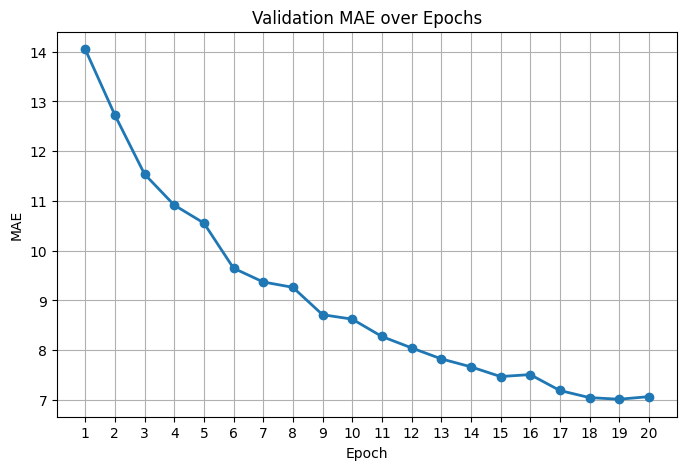

In [16]:
mae_values = [
    14.0509, 12.7274, 11.5398, 10.9161, 10.5559,
    9.6476, 9.3707, 9.2629, 8.7126, 8.6234,
    8.2747, 8.0455, 7.8250, 7.6647, 7.4687,
    7.5083, 7.1884, 7.0454, 7.0130, 7.0650
]

import matplotlib.pyplot as plt

epochs = list(range(1, len(mae_values) + 1))

plt.figure(figsize=(8, 5))
plt.plot(epochs, mae_values, marker='o', linestyle='-', linewidth=2)
plt.title("Validation MAE over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.grid(True)
plt.xticks(epochs)
plt.show()


In [11]:
test_df = pd.read_csv("/test.csv")

# Tokenize the text using the same tokenizer
test_encodings = tokenizer(
    test_df["query"].tolist(),
    truncation=True,
    padding=True,
    max_length=64,
    return_tensors="pt"
)


In [12]:
from torch.utils.data import DataLoader, Dataset

class TestDataset(Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __len__(self):
        return len(self.encodings["input_ids"])

    def __getitem__(self, idx):
        return {key: val[idx] for key, val in self.encodings.items()}

test_dataset = TestDataset(test_encodings)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [15]:
# 1. Load model
model = torch.load("full_model.pt", weights_only=False)
model.to("cuda")
model.eval()

# 2. Make predictions
predicted_carbs = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"].to("cuda")
        attention_mask = batch["attention_mask"].to("cuda")

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        predicted_carbs.extend(outputs.cpu().numpy())

# 3. Attach predictions to test_df
test_df["predicted_carb"] = predicted_carbs

# 4. Save to CSV
test_df.to_csv("nutribench_test_with_predictions.csv", index=False)
